In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('.', 'src')))

import numpy as np
from numpy.linalg import norm
from scipy.linalg import sqrtm

from GaussianProcess import GP, saw_nothing_title, noisy_obs_title, noise_free_title

# Code and examples: gaussian process regression (univariate)

This section is inspired by [chapter 2](http://www.gaussianprocess.org/gpml/chapters/RW2.pdf), question 1 of GPML:

> Replicate the generation of random functions from Figure 2.2. Use a regular (or random) grid of scalar inputs and the covariance function from eq. (2.16). Hints on how to generate random samples from multi-variate Gaussian distributions are given in section A.2. Invent some training data points, and make random draws from the resulting GP posterior using eq. (2.19).

## Examples

### Covariance function: squared exponential 

Squared exponential, given by $E^{-\frac{distance^2}{2*l}}$, where $l$ is the "characteristic length-scale". Intuitively, $l$ is a parameter telling us how close two points have to be to influence one another.


When $l$ is small, points are only influenced by close neighbors

When $l$ big, points influenced by distant points.

See page 83 GPML for more ([link](http://www.gaussianprocess.org/gpml/chapters/RW4.pdf)).

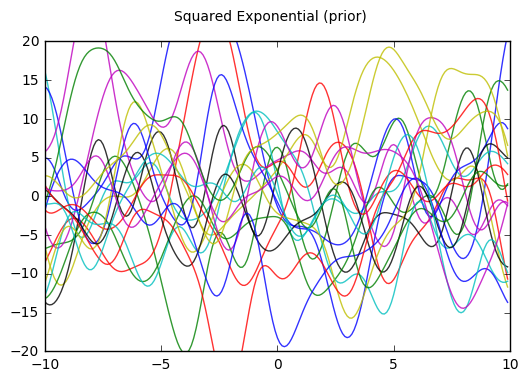

In [2]:
# Plot samples from the prior:

# Space to sample
sample_space = np.arange(-10, 10, .1);

# Kernel (note that it has a hyperparameter):
def cov(x1, x2):
    length_scale = .01;
    return np.exp(-.5 * np.linalg.norm(np.subtract(x2, x1))**2)/(2*length_scale)

gp = GP(cov); 
gp.sample(sample_space, 20); gp.plot()
p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-20,20]);
p.suptitle(saw_nothing_title("Squared Exponential"));

/Users/erinc/Desktop/bayesian-optimization/GaussianProcesses/src/GaussianProcess.py:37: RuntimeWarning: invalid value encountered in sqrt
  pred_2sds = 2 * np.sqrt(self.cov(new_point, new_point) - np.dot(np.dot(new_row, self.kinv), new_row))


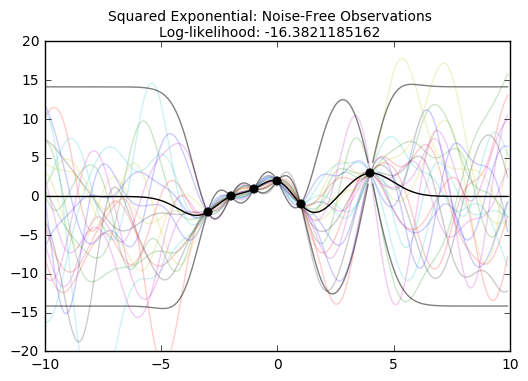

In [3]:
# Make some observations and plot the posterior:
X, y = np.array([-3., -2, -1, 0, 1, 4]), np.array([-2., 0, 1, 2, -1, 3])

gp.observe(X, y)

gp.sample(sample_space, 20); 

gp.plot();p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-20,20]);
p.suptitle(noise_free_title("Squared Exponential", gp.model_log_likelihood()));

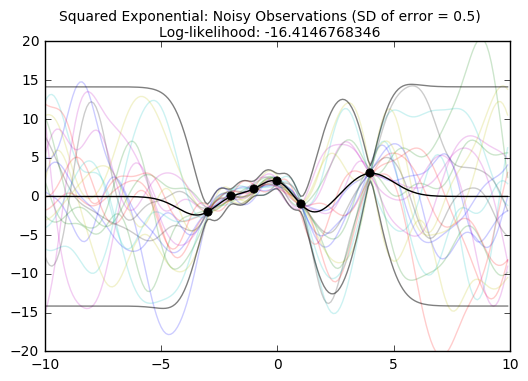

In [4]:
# Forget the things we've already seen. Make some noisy observations and plot the posterior:
sigma = .5

gp.forget()
gp.observe(X, y, noise = True, sigma = sigma)

gp.sample(sample_space, 20); gp.plot()
p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-20,20]);
p.suptitle(noisy_obs_title("Squared Exponential", sigma, gp.model_log_likelihood()));

### Covariance function: rational quadratic


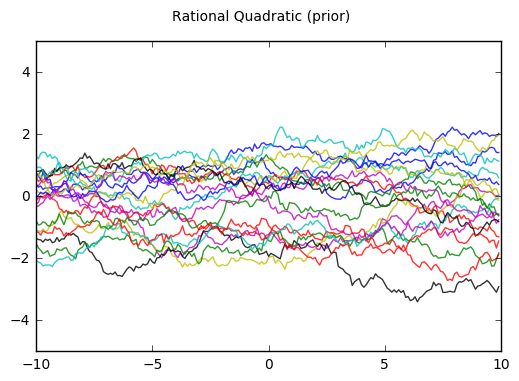

In [5]:
sample_space = np.arange(-10, 10, .1)

def cov(x1, x2):
    alpha = 10; l = 1;
    return (1 + np.linalg.norm(np.subtract(x2, x1)/(2*alpha*l)))**-l

gp = GP(cov)

gp.sample(sample_space, 20)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,5]);
p.suptitle(saw_nothing_title("Rational Quadratic"));

/Users/erinc/Desktop/bayesian-optimization/GaussianProcesses/src/GaussianProcess.py:37: RuntimeWarning: invalid value encountered in sqrt
  pred_2sds = 2 * np.sqrt(self.cov(new_point, new_point) - np.dot(np.dot(new_row, self.kinv), new_row))


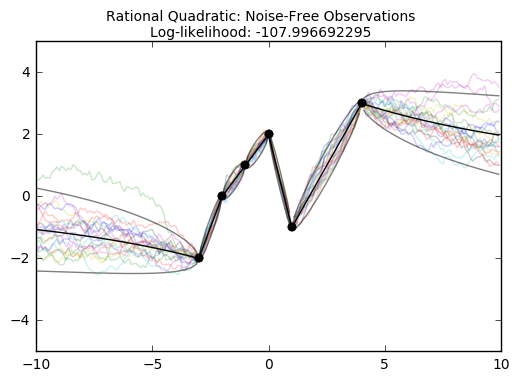

In [6]:
# Make some observations and plot the posterior:
X, y = np.array([-3., -2, -1, 0, 1, 4]), np.array([-2., 0, 1, 2, -1, 3])

gp.observe(X, y)
gp.sample(sample_space, 20)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,5]);
p.suptitle(noise_free_title("Rational Quadratic", gp.model_log_likelihood()));

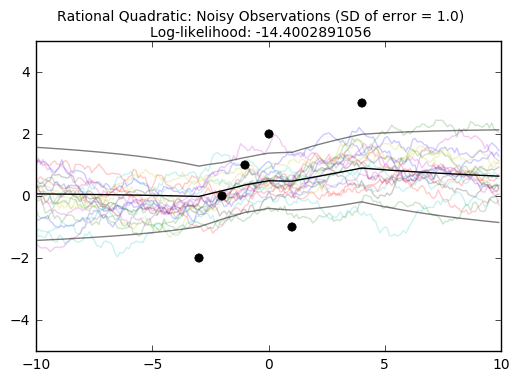

In [7]:
# Forget. Make some noisy observations and plot the posterior:
sigma = 1.

gp.forget()
gp.observe(X, y, noise = True, sigma=sigma)
gp.sample(sample_space, 20)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,5]);
p.suptitle(noisy_obs_title("Rational Quadratic", sigma, gp.model_log_likelihood()));

### Covariance function: I don't know what this is called
[link](http://www.robots.ox.ac.uk/~mebden/reports/GPtutorial.pdf)

A squared exponential plus a periodic part:

$$\exp(\frac{-\sigma_f^2}{2l} \lvert{x_2 - x_1}\rvert^2) + \exp{(- 2 \sin( v \pi \lvert{x_2 - x_1}\rvert))^2}$$

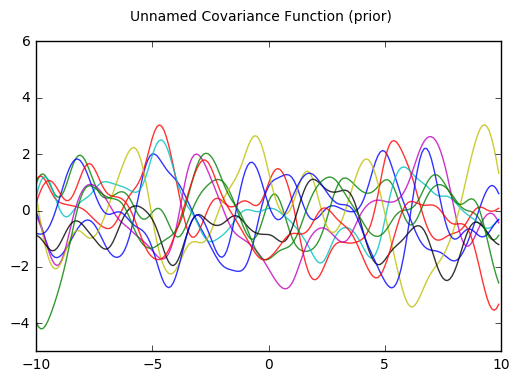

In [8]:
sample_space = np.arange(-10, 10, .1)

def cov(x1,x2):
    sigmaf = 1.269; l = 1; v = .20
    base = np.exp((-1/(2*l))*(sigmaf**2 * norm(np.subtract(x1,x2))**2)) + np.exp(-2*np.sin(v*np.pi*np.subtract(x1,x2))**2)
    return base 


gp = GP(cov)
gp.sample(sample_space, 10)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,6]);
p.suptitle(saw_nothing_title("Unnamed Covariance Function"));

/Users/erinc/Desktop/bayesian-optimization/GaussianProcesses/src/GaussianProcess.py:37: RuntimeWarning: invalid value encountered in sqrt
  pred_2sds = 2 * np.sqrt(self.cov(new_point, new_point) - np.dot(np.dot(new_row, self.kinv), new_row))


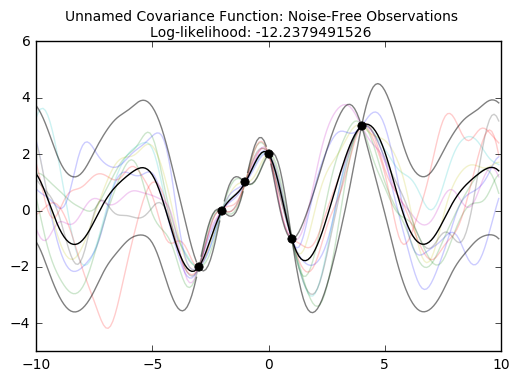

In [9]:
# Make some observations and plot the posterior:
X, y = np.array([-3., -2, -1, 0, 1, 4]), np.array([-2., 0, 1, 2, -1, 3])

gp.observe(X, y)
gp.sample(sample_space, 10)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,6]);
p.suptitle(noise_free_title("Unnamed Covariance Function", gp.model_log_likelihood()));

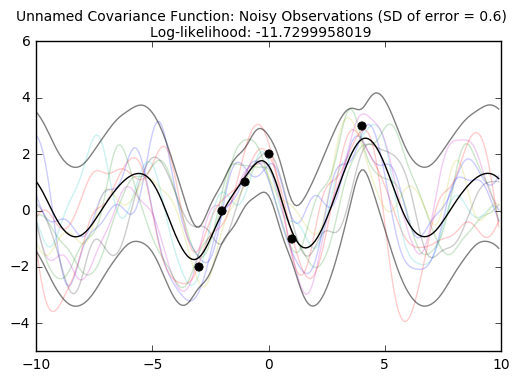

In [10]:
# Make some noisy observations and plot the posterior:
sigma = .6
gp.forget(); gp.observe(X, y, noise = True, sigma = sigma)
gp.sample(sample_space, 10)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,6]);
p.suptitle(noisy_obs_title("Unnamed Covariance Function", sigma, gp.model_log_likelihood()));

### Same function, different points

/Users/erinc/Desktop/bayesian-optimization/GaussianProcesses/src/GaussianProcess.py:37: RuntimeWarning: invalid value encountered in sqrt
  pred_2sds = 2 * np.sqrt(self.cov(new_point, new_point) - np.dot(np.dot(new_row, self.kinv), new_row))


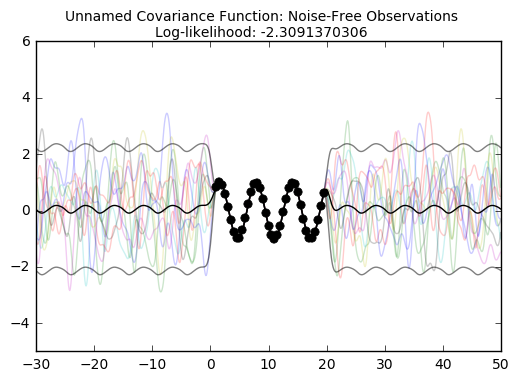

In [11]:
# How about different points?
# this is slow
X = np.arange(1,20,.5) 
y = np.sin(X)
sample_space = np.arange(-30, 50, .1)

def cov(x1,x2):
    sigmaf =1.269; 
    l = 1; 
    v = .20
    
    base = np.exp((-1/(2*l))*(sigmaf**2 * norm(np.subtract(x1,x2))**2)) + np.exp(-2*np.sin(v*np.pi*np.subtract(x1,x2))**2)

    return base

gp = GP(cov)
gp.observe(X, y, noise = False)
gp.sample(sample_space, 10)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,6]);
p.suptitle(noise_free_title("Unnamed Covariance Function", gp.model_log_likelihood()));

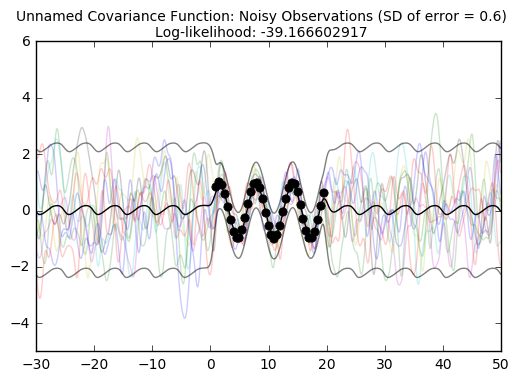

In [12]:
# Noise
sigma = .6

# Make some noisy observations and plot the posterior:
gp.forget(); gp.observe(X, y, noise = True, sigma = sigma)
gp.sample(sample_space, 10)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-5,6]);
p.suptitle(noisy_obs_title("Unnamed Covariance Function", sigma, gp.model_log_likelihood()));

/Users/erinc/Desktop/bayesian-optimization/GaussianProcesses/src/GaussianProcess.py:37: RuntimeWarning: invalid value encountered in sqrt
  pred_2sds = 2 * np.sqrt(self.cov(new_point, new_point) - np.dot(np.dot(new_row, self.kinv), new_row))


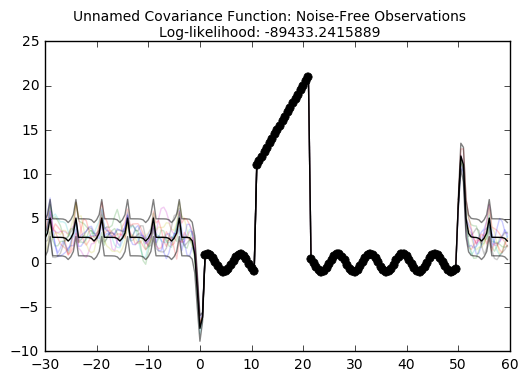

In [13]:
# Periodic followed by linear followed by periodic?
# Very weird...
X = np.arange(1,50,.5) 
y = np.concatenate((np.sin(X[:20]), X[20:41], np.sin(X[41:])))
sample_space = np.arange(-30, 60, .5)

gp.forget(); gp.observe(X, y, noise = False)
gp.sample(sample_space, 10)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-10,25]);
p.suptitle(noise_free_title("Unnamed Covariance Function", gp.model_log_likelihood()));

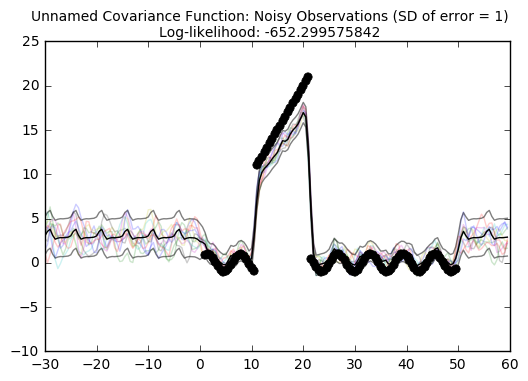

In [14]:
# Periodic followed by linear followed by periodic?

# Look at different sigmas.
sigma = 1

gp.forget(); gp.observe(X, y, noise = True, sigma = sigma)
gp.sample(sample_space, 10)
gp.plot(); p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-10,25]);
p.suptitle(noisy_obs_title("Unnamed Covariance Function", sigma, gp.model_log_likelihood()));

# Problem 3 
### Brownian bridge/tied-down Wiener process

The Wiener process is defined for $x \geq 0$ and has $f(0) = 0$. (See section B.2.1 for further details.) It has mean zero and a non-stationary covariance function $k(x, x^*) = min(x, x^*)$. If we condition on the Wiener process passing through $f(1) = 0$ we obtain a process known as the Brownian bridge (or tied-down Wiener process). Show that this process has covariance $k(x, x^*) = min(x,x^*)−xx^*$ for $0 \leq x, x^* \leq 1$ and mean $0$. Write a computer program to draw samples from this process at a finite grid of x points in $[0, 1]$.

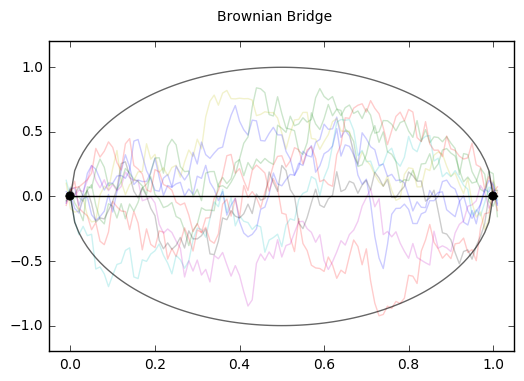

In [15]:
how_many     = 10
sample_space = np.arange(0-0.01, 1.02, .01)

def cov(x1,x2):
    return min(x1, x2) - x1*x2

# Observed data:
X    = np.array([0., 1])
y    = np.array([0., 0])
K    = np.array([[cov(a,b) for a in X] for b in X])

# Compute the mean vector and covariance matrix:
kinv      = np.linalg.pinv(K)
ks        = np.array([[cov(l, xv) for xv in X] for l in sample_space])
kss       = np.array([[cov(l, j) for l in sample_space] for j in sample_space])
pred_mean = np.dot(ks, np.dot(kinv, y))
pred_cov  = np.subtract(kss, np.dot(ks, np.dot(kinv, np.transpose(ks))))

# Draw from distribution
A = sqrtm(pred_cov)
z = np.random.normal(0, 1, (how_many, pred_cov.shape[0]))
samples = np.array([np.add(pred_mean, np.dot(A, x)) for x in z])

sds  = [np.sqrt(cov(s, s) - (lambda x: np.dot(np.dot(x, kinv), x))([cov(s, xv) for xv in X])) for s in sample_space[1:-1]]

# And plot:
for i in range(len(samples)):
    plt.plot(sample_space, samples[i], alpha=.2)

plt.plot(sample_space, pred_mean, '-', color='k', alpha= 1)
plt.plot(sample_space[1:-1], [-2 * a for a in sds], '-', color='k', alpha=.6)
plt.plot(sample_space[1:-1], [ 2 * a for a in sds], '-', color='k', alpha=.6)

plt.plot(X, y, 'o', color = 'k');
plt.suptitle("Brownian Bridge")
p = plt.gcf(); ax = p.get_axes()[0]; ax.set_ylim([-1.2,1.2]); ax.set_xlim([-.05,1.05]);